# EcomFruitAI - Fruit Image Generation with Diffusion Models

This notebook demonstrates the creation of synthetic fruit images using diffusion models trained on the Fruits-360 dataset.

In [1]:
# Install required packages
%pip install kagglehub diffusers transformers accelerate torch torchvision

# Import our custom modules
import sys
sys.path.append('..')

from ecomfruitai.dataset import download_fruit_dataset, create_datasets_and_loaders
from ecomfruitai.modeling.train import setup_models, train_model
from ecomfruitai.modeling.predict import generate_image, generate_multiple_images
from ecomfruitai.plots import show_generated_image, show_multiple_generated_images, visualize_dataset_samples
from ecomfruitai.config import DEVICE, GENERATION_CONFIG

print(f"Using device: {DEVICE}")


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
Using device: cpu
Using device: cpu


In [2]:
# Download dataset and verify structure
import os

dataset_path = download_fruit_dataset()
print(f"Dataset downloaded to: {dataset_path}")

# Verify the structure
train_path = os.path.join(dataset_path, "Training")
test_path = os.path.join(dataset_path, "Test")

print(f"Training path exists: {os.path.exists(train_path)}")
print(f"Test path exists: {os.path.exists(test_path)}")

if os.path.exists(train_path):
    sample_classes = os.listdir(train_path)[:5]
    print(f"Sample classes: {sample_classes}")

Download already complete (3656264020 bytes).
Extracting files...
Extracting files...
Path to dataset files: C:\Users\Carlos\.cache\kagglehub\datasets\moltean\fruits\versions\45
Dataset downloaded to: C:\Users\Carlos\.cache\kagglehub\datasets\moltean\fruits\versions\45\fruits-360_100x100\fruits-360
Training path exists: True
Test path exists: True
Sample classes: ['Apple 10', 'Apple 11', 'Apple 12', 'Apple 13', 'Apple 14']
Path to dataset files: C:\Users\Carlos\.cache\kagglehub\datasets\moltean\fruits\versions\45
Dataset downloaded to: C:\Users\Carlos\.cache\kagglehub\datasets\moltean\fruits\versions\45\fruits-360_100x100\fruits-360
Training path exists: True
Test path exists: True
Sample classes: ['Apple 10', 'Apple 11', 'Apple 12', 'Apple 13', 'Apple 14']


In [3]:
# Setup dataset and loaders
train_loader, test_loader, descriptive_classes = create_datasets_and_loaders(dataset_path)

print(f"Train dataset: {len(train_loader.dataset)} images")
print(f"Test dataset: {len(test_loader.dataset)} images")
print(f"Number of descriptive classes: {len(descriptive_classes)}")

Dataset path: C:\Users\Carlos\.cache\kagglehub\datasets\moltean\fruits\versions\45\fruits-360_100x100\fruits-360
Total classes: 201
Descriptive classes: 91
Dataset created with 45427 images
Dataset created with 45427 images
Dataset created with 15161 images
Train dataset: 1000 images
Test dataset: 15161 images
Number of descriptive classes: 91
Dataset created with 15161 images
Train dataset: 1000 images
Test dataset: 15161 images
Number of descriptive classes: 91


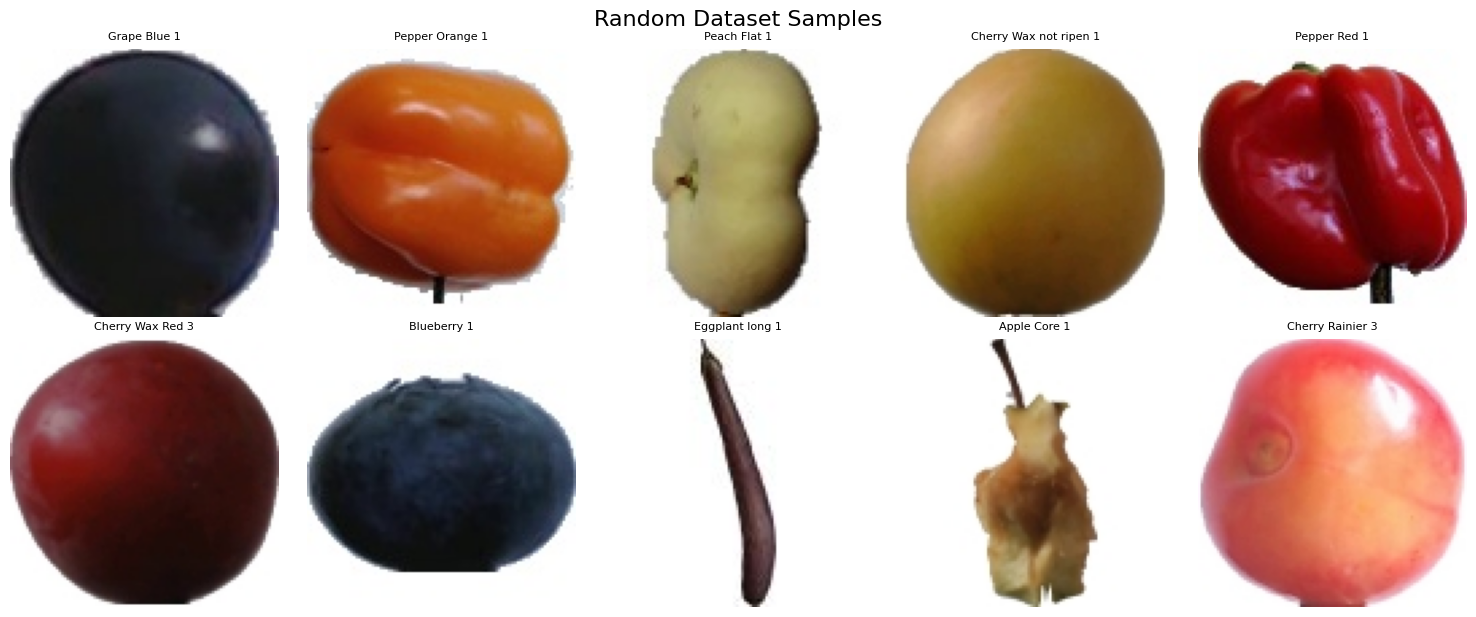

In [4]:
# Visualize dataset samples
visualize_dataset_samples(dataset_path, descriptive_classes, num_samples=10)

In [5]:
# Setup models
models = setup_models()
tokenizer, text_encoder, vae, unet, scheduler = models

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

c:\Python312\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Carlos\.cache\huggingface\hub\models--openai--clip-vit-base-patch32. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

c:\Python312\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Carlos\.cache\huggingface\hub\models--stabilityai--sd-vae-ft-mse. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

Models loaded successfully!
UNet parameters: 139,680,132


In [ ]:
# Train the model
def generate_fn(prompt, num_inference_steps=20):
    return generate_image(prompt, models, num_inference_steps)

print("Starting training...")
trained_unet = train_model(train_loader, models, generate_fn)

# Update models tuple with trained UNet
tokenizer, text_encoder, vae, unet, scheduler = models
trained_models = (tokenizer, text_encoder, vae, trained_unet, scheduler)

print("Training completed! Models updated with trained UNet.")

NameError: name 'train_model' is not defined

In [ ]:
# Generate test images with trained model
test_prompts = [
    "red apple, whole fruit, realistic photo",
    "green apple, whole fruit, realistic photo", 
    "yellow banana, whole fruit, realistic photo",
    "orange carrot, whole vegetable, realistic photo"
]

print("Generating images with trained model...")
generated_images = generate_multiple_images(test_prompts, trained_models, num_inference_steps=20)
show_multiple_generated_images(generated_images, test_prompts)

In [ ]:
# Generate single high-quality image with trained model
prompt = "red apple, whole fruit, realistic photo"
print(f"Generating high-quality image with trained model: {prompt}")
high_quality_image = generate_image(prompt, trained_models, num_inference_steps=50)
show_generated_image(high_quality_image, title=f"High Quality (Trained Model): {prompt}")

## Comparison: Pre-trained vs Trained Model

generation quality between the pre-trained and trained models.

In [ ]:
# Compare pre-trained vs trained model
comparison_prompt = "red apple, whole fruit, realistic photo"

print("Generating with pre-trained model...")
pretrained_image = generate_image(comparison_prompt, models, num_inference_steps=30)

print("Generating with trained model...")
trained_image = generate_image(comparison_prompt, trained_models, num_inference_steps=30)

# Display comparison
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Pre-trained model image
img1 = pretrained_image[0].cpu().numpy()
img1 = np.transpose(img1, (1, 2, 0))
img1 = np.clip(img1, 0, 1)
axes[0].imshow(img1)
axes[0].set_title("Pre-trained Model", fontsize=14)
axes[0].axis('off')

# Trained model image
img2 = trained_image[0].cpu().numpy()
img2 = np.transpose(img2, (1, 2, 0))
img2 = np.clip(img2, 0, 1)
axes[1].imshow(img2)
axes[1].set_title("Trained Model", fontsize=14)
axes[1].axis('off')

plt.suptitle(f'Comparison: {comparison_prompt}', fontsize=16)
plt.tight_layout()
plt.show()